# Import libraries

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (
    InputLayer,
    Flatten,
    Dense,
    Conv2D,
    MaxPool2D,
    Dropout,
)
from tensorflow.keras.optimizers import Adam
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt

# Load datasets & labelling


In [7]:
imagePaths = "./Dataset/"
label_list = ["Nangka", "Daun Sirih"]
data = []
labels = []

for label in label_list:
    for imagePath in glob.glob(imagePaths + label + "/*.jpg"):
        # print(imagePath)
        image = cv2.imread(imagePath)
        images = cv2.resize(image, (32, 32))
        data.append(images)
        labels.append(label)

np.array(data).shape

# ubah type data dari list menjadi array
# ubah nilai dari tiap pixel menjadi range [0..1]
for i in range(len(data)):
    for j in range(len(data[i])):
        for k in range(len(data[i][j])):
            data[i][j][k] = data[i][j][k] / 255.0

labels = np.array(labels)

# ubah nilai dari labels menjadi binary
# ubah nilai dari labels menjadi binary
lb = LabelEncoder()
labels = lb.fit_transform(labels)


# Splitting Data

In [12]:
test_portion = len(data)*30/100
train_data = []
train_labels = []
test_data = []
test_labels = []

for i in range(len(data)):
    if i > len(data) - test_portion/2-1:
        test_data.append(data[i])
        test_labels.append(labels[i])
    elif i < test_portion/2:
        test_data.append(data[i])
        test_labels.append(labels[i])
    else:
        train_data.append(data[i])
        train_labels.append(labels[i])

x_train = np.array(train_data) / 255.0
x_test = np.array(test_data) / 255.0
y_train = np.array(train_labels)
y_test = np.array(test_labels)

print("Ukuran data train =", x_train.shape)
print("Ukuran data test =", x_test.shape)

Ukuran data train = (70, 32, 32, 3)
Ukuran data test = (32, 32, 32, 3)


# Architecturing CNN Model

In [9]:
model = Sequential()
model.add(InputLayer(input_shape=(32, 32, 3)))
model.add(Conv2D(filters=32, kernel_size=2, strides=1, padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=2, padding="same"))
model.add(Conv2D(filters=50, kernel_size=2, strides=1, padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=2, padding="same"))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(len(label_list), activation="softmax"))
model.summary()

# tentukan hyperparameter
lr = 0.001
max_epochs = 100
opt_funct = Adam(learning_rate=lr)

# compile arsitektur yang telah dibuat
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt_funct, metrics=["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        416       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 50)        6450      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 50)          0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 8, 8, 50)          0         
                                                                 
 flatten (Flatten)           (None, 3200)              0

# Model Training & Testing

Epoch 1/100
3/3 [==============================] - 0s 90ms/step - loss: 0.0751 - accuracy: 0.9714 - val_loss: 0.1324 - val_accuracy: 0.9688
Epoch 2/100
3/3 [==============================] - 0s 62ms/step - loss: 0.0895 - accuracy: 0.9571 - val_loss: 0.1252 - val_accuracy: 0.9688
Epoch 3/100
3/3 [==============================] - 0s 60ms/step - loss: 0.0828 - accuracy: 0.9429 - val_loss: 0.1262 - val_accuracy: 0.9688
Epoch 4/100
3/3 [==============================] - 0s 60ms/step - loss: 0.0737 - accuracy: 0.9714 - val_loss: 0.1273 - val_accuracy: 0.9688
Epoch 5/100
3/3 [==============================] - 0s 66ms/step - loss: 0.1062 - accuracy: 0.9571 - val_loss: 0.1321 - val_accuracy: 0.9688
Epoch 6/100
3/3 [==============================] - 0s 63ms/step - loss: 0.0757 - accuracy: 0.9714 - val_loss: 0.1368 - val_accuracy: 0.9688
Epoch 7/100
3/3 [==============================] - 0s 70ms/step - loss: 0.0728 - accuracy: 0.9571 - val_loss: 0.1302 - val_accuracy: 0.9688
Epoch 8/100
3/3 [===

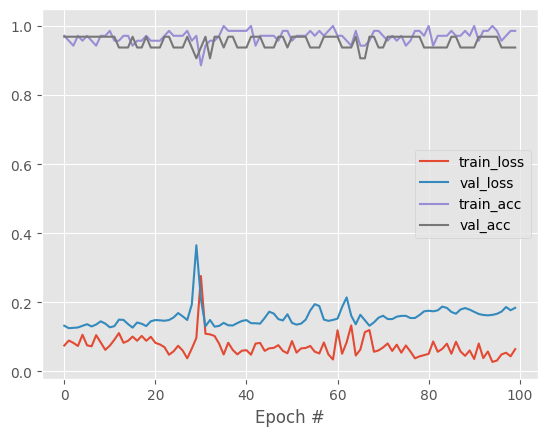

In [13]:
# Train model
H = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=max_epochs, batch_size=32)
N = np.arange(0, max_epochs)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.xlabel("Epoch #")
plt.legend()
plt.show()

# Evaluating Model

In [14]:
# menghitung nilai akurasi model terhadap data test
predictions = model.predict(x_test)
target = predictions.argmax(axis=1)
print(classification_report(y_test, target, target_names=label_list, zero_division=1))

1/1 [==============================] - 0s 53ms/step
              precision    recall  f1-score   support

      Nangka       1.00      0.88      0.93        16
  Daun Sirih       0.89      1.00      0.94        16

    accuracy                           0.94        32
   macro avg       0.94      0.94      0.94        32
weighted avg       0.94      0.94      0.94        32

